<a href="https://colab.research.google.com/github/Hriday1824/Image-Processing/blob/main/Image_Processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram Equalization

Histogram equalization is a widely used technique in image processing and computer vision to enhance the contrast of an image by redistributing its intensity levels. The primary goal is to change the pixel values so that the cumulative distribution function (CDF) of the image's intensity histogram is roughly uniform. We use Histogram Equalization to have better image visualization and quality, to improve the contrast of the image
Histogram Equalization can be performed in the following steps:
1.   Calculate the histogram of the input image which represents the pixel intensities of the image
2.   Calculate the Cumulative Distribution Function(CDF) of the histogram by adding its values
3.   Normalize the CDF by multiplying it with 255 to get in the range of [0,255].
4.   Replace the intensity value of each pixel of the original imagewith the respective value of the normalized CDF
5.   Display the resulting image

Applications of Histogram Equalization:
1.   Used in medical fields for X-ray, CT scans and MRI scans
2.   Used in computer vision
3.   Used in Video Surveillance
4.   Used in Digital Phtography

Reference1: https://en.wikipedia.org/wiki/Histogram_equalization

Reference2: https://towardsdatascience.com/histogram-equalization-5d1013626e64

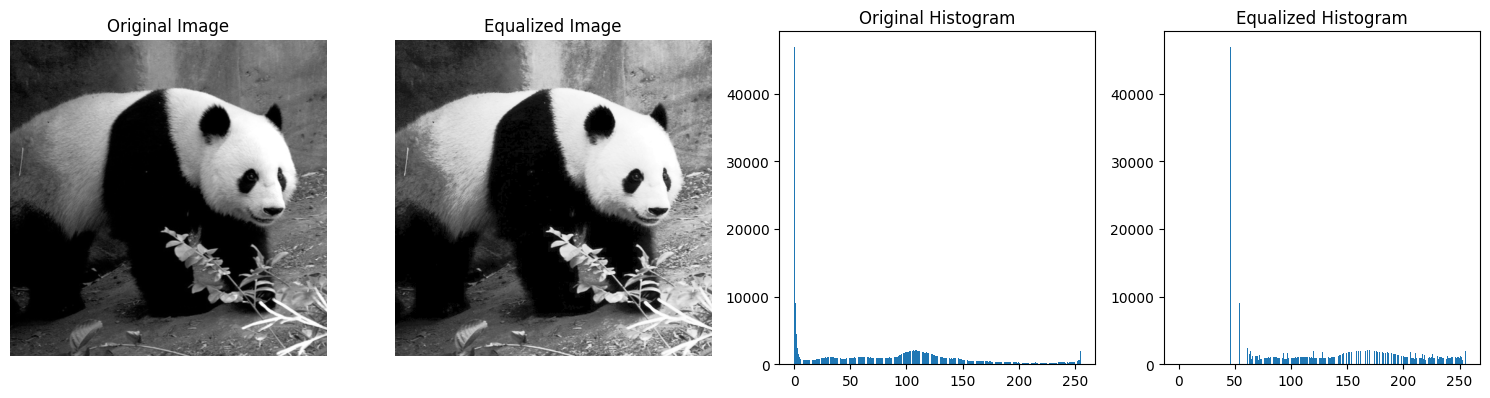

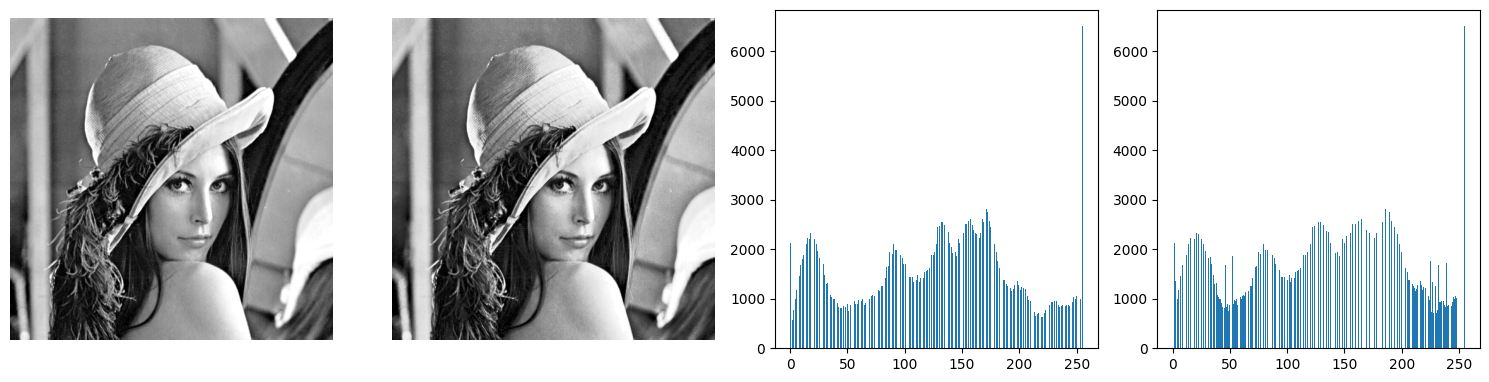

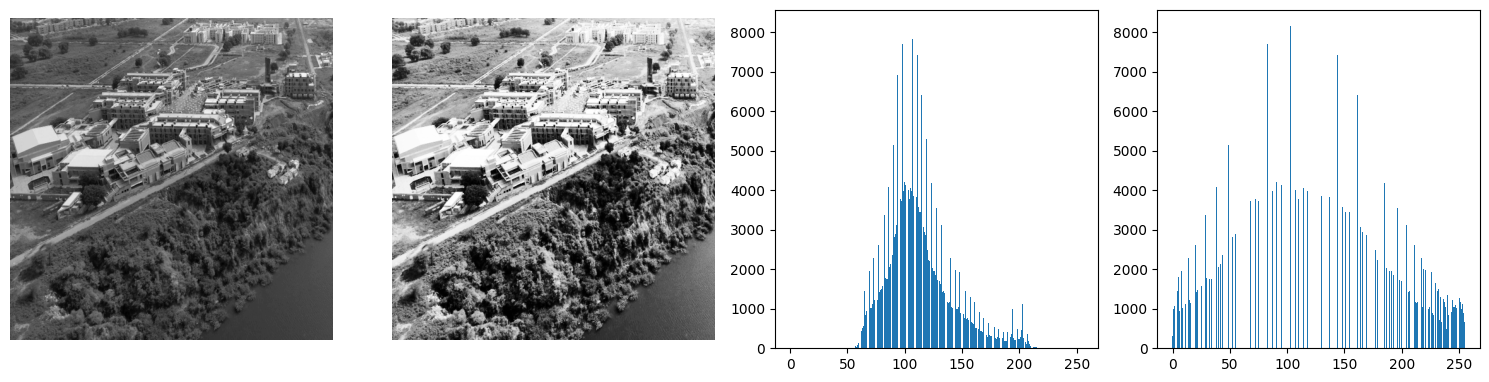

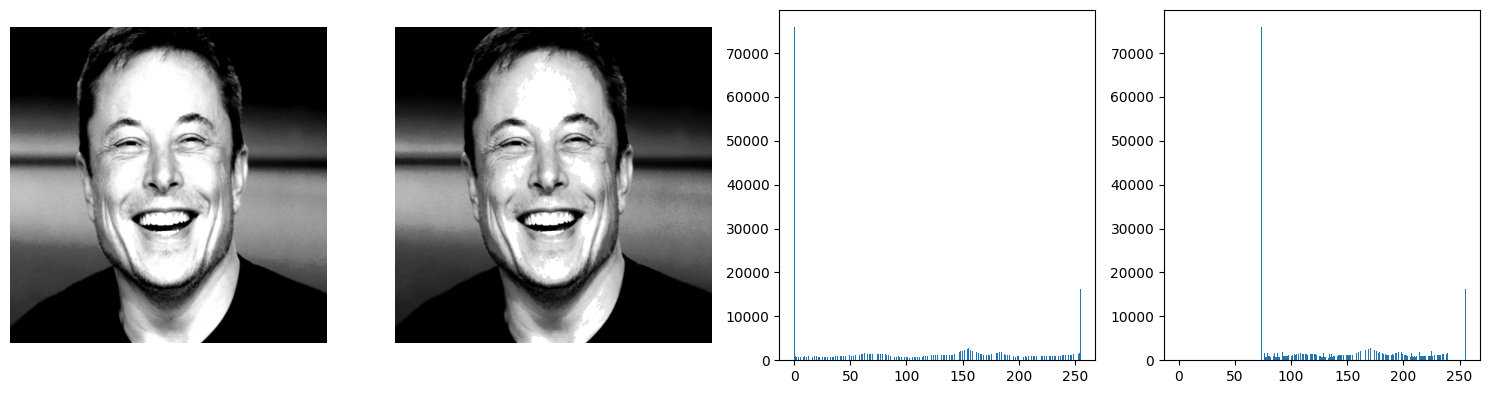

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
image1=cv.imread("/content/drive/MyDrive/imgproc/grey_1.png",0)    #Panda
image2=cv.imread("/content/drive/MyDrive/imgproc/grey_2.png",0)    #Girl
image3=cv.imread("/content/drive/MyDrive/imgproc/grey_3.png",0)    #City
image4=cv.imread("/content/drive/MyDrive/imgproc/grey_4.png",0)    #Elon Musk
def histogram(img):
  hist={}
  for i in range(256):
    hist[i]=0
  h,w=img.shape
  for i in range(h):
    for j in range(w):
      hist[img[i,j]]+=1
  return hist
def CDF(H,img):
  total=0
  h,w=img.shape
  for i in range(h):
    for j in range(w):
      total+=1
  pixels=np.array(list(H.values()))
  cdf=np.cumsum(pixels)/total
  scaled_cdf=np.round(np.cumsum(pixels)*255/total)
  return total,pixels,cdf,scaled_cdf
def equalization(img):
  map={}
  Histogram=histogram(img)
  total,Pixel,cdf,scaled_cdf=CDF(Histogram,img)
  for i in range(256):
    map[i]=cdf[i]*float(total)
  new_hist={}
  for i in range(256):
    new_hist[i]=0
  for a in range(len(scaled_cdf)):
    new_hist[scaled_cdf[a]]+=Pixel[a]
  new_image=np.zeros(img.shape)
  x,y=new_image.shape
  for i in range(x):
    for j in range(y):
      new_image[i,j]=scaled_cdf[img[i,j]]
  return Histogram,new_hist,new_image
images=[image1,image2,image3,image4]
for i in range(4):
  Original_Histogram,New_Histogram,New_Image=equalization(images[i])
  plt.figure(figsize=(15,15))
  plt.subplot(4,4,3+4*i)
  plt.tight_layout()
  plt.bar(Original_Histogram.keys(),Original_Histogram.values())
  if i==0:
    plt.title("Original Histogram")
  plt.subplot(4,4,4+4*i)
  plt.tight_layout()
  plt.bar(New_Histogram.keys(),New_Histogram.values())
  # cum = np.cumsum(np.array(list(New_Histogram.values())))
  # plt.plot(New_Histogram.keys(),cum*max(New_Histogram.values())/cum[-1],color='pink')
  if i==0:
    plt.title("Equalized Histogram")
  plt.subplot(4,4,1+4*i)
  plt.tight_layout()
  plt.imshow(images[i],cmap="gray")
  if i==0:
    plt.title("Original Image")
  plt.axis("off")
  plt.subplot(4,4,2+4*i)
  plt.tight_layout()
  plt.imshow(New_Image,cmap="gray")
  plt.axis("off")
  if i==0:
    plt.title("Equalized Image")
  plt.tight_layout()
plt.show()

# Histogram Matching

Histogram matching is a technique used in image processing and computer vision to adjust the intensity distribution of an image to match that of a reference image or a desired distribution. The primary goal of histogram matching is to enhance the visual appearance of an image or to bring it closer to a specific desired look.

We can perform Histogram Matching with the following steps:
1.   Compute the histograms of the source image and the reference (target) image.
2.   Normalize both histograms by dividing each bin by the total number of pixels in the image
3.   Compute the cumulative distribution function (CDF) for both the source and reference histograms.
4.   Create a mapping function that maps each intensity value in the source image to the corresponding intensity value in the reference image.
5.   Use the mapping function to transform the pixel values in the source image.
6.   Display the matched image and matched histogram.

Applications of Histogram Matching:
1.   Histogram matching can be used to improve the contrast and brightness of images.
2.   In medical image analysis, histogram matching can be employed to standardize the appearance of images acquired from different sources or at different times. This ensures consistency and comparability in the analysis of medical images.
3.   Histogram matching can be used to preprocess facial images to standardize lighting conditions. This aids in improving the accuracy and robustness of face recognition systems by reducing the impact of variations in lighting.
4.   Histogram matching is sometimes used as a data augmentation technique in machine learning, especially in image classification tasks. It helps to generate additional training data by varying the appearance of images while preserving their semantic content.



Reference1: https://en.wikipedia.org/wiki/Histogram_matching

Reference2: https://www.geeksforgeeks.org/histogram-matching-with-opencv-scikit-image-and-python/

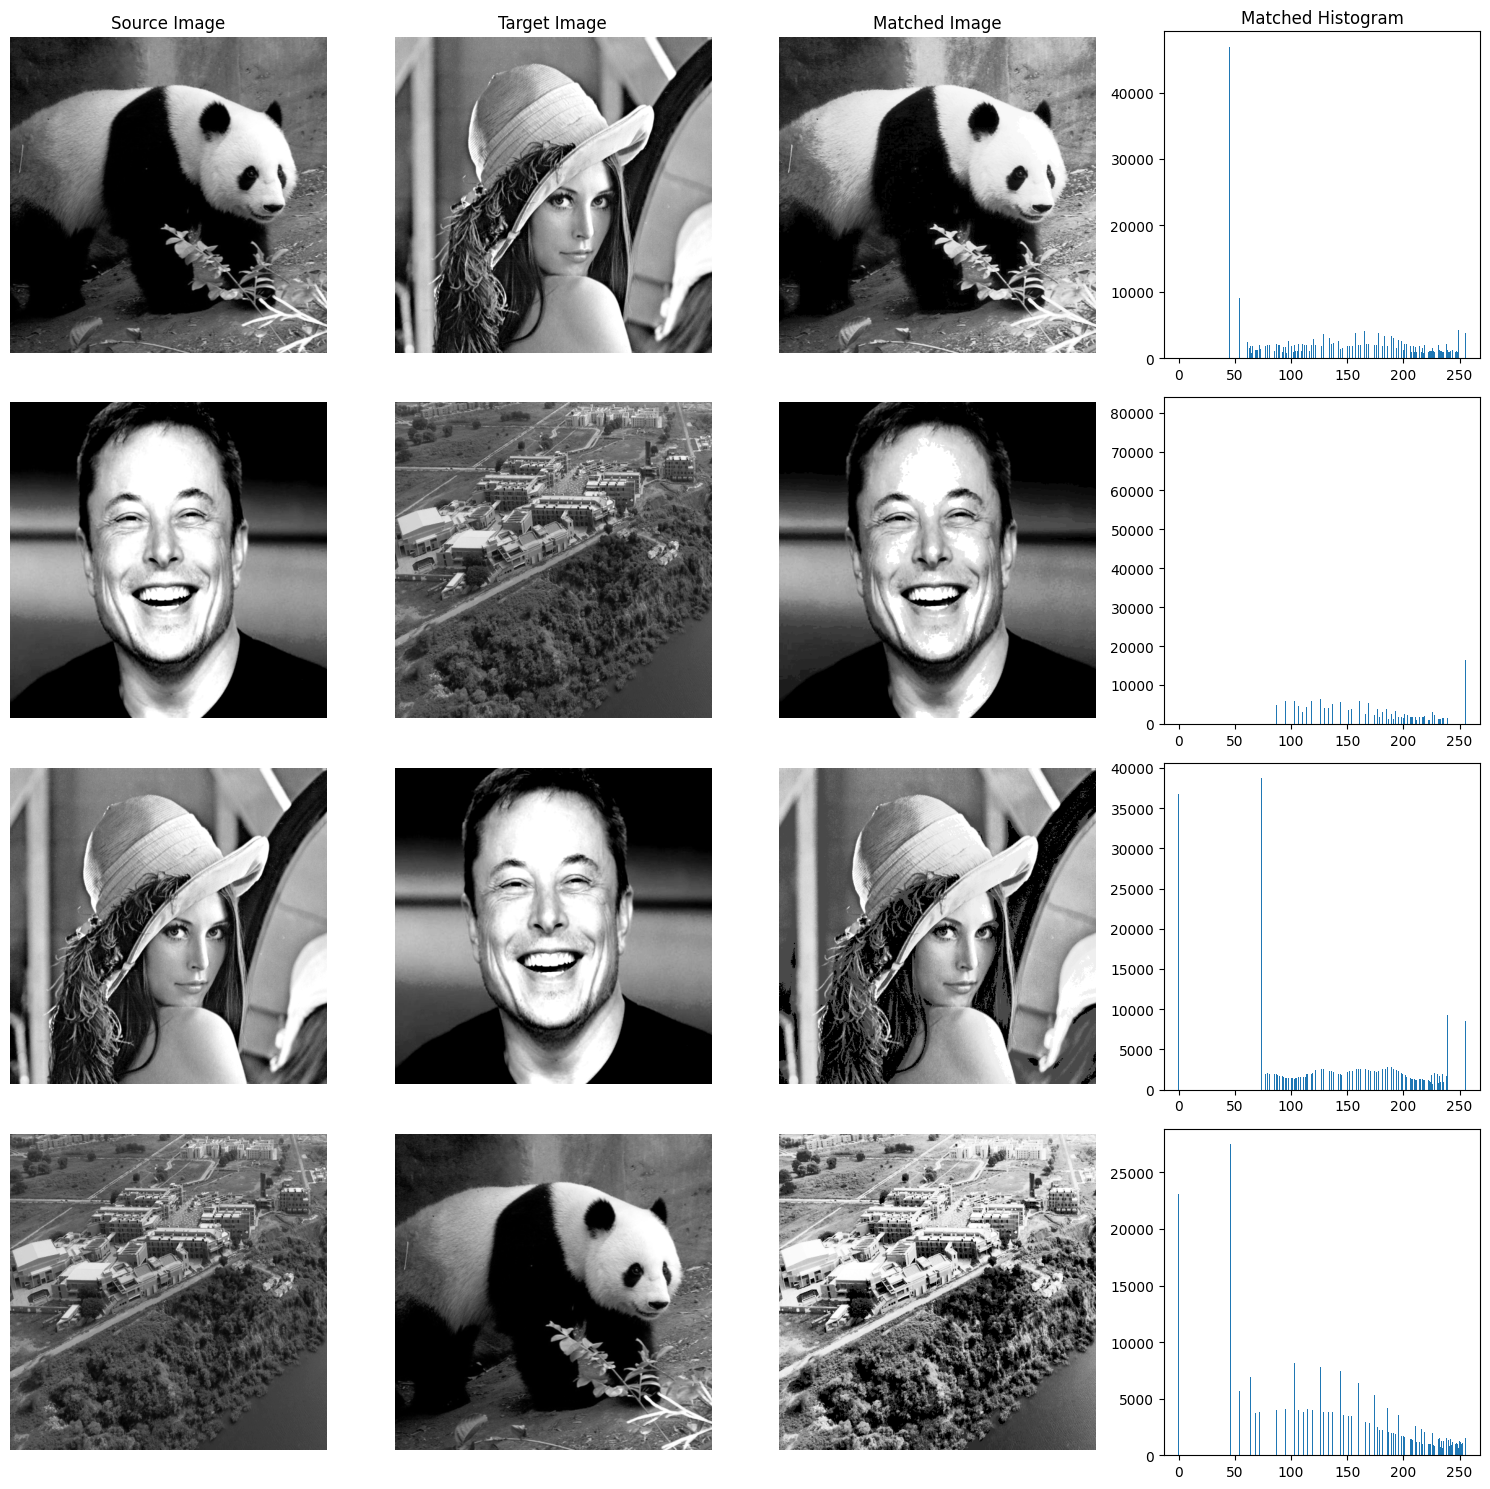

In [ ]:
def matching(iA,iB):
  matched_hist={}
  A,h1,B=equalization(iA)
  A1,h2,B1=equalization(iB)
  h1_vals = list(np.cumsum(list(h1.values())))
  h2_vals = list(np.cumsum(list(h2.values())))
  h1 = {i:h1_vals[i] for i in range(len(h1_vals))}
  h2 = {i:h2_vals[i] for i in range(len(h2_vals))}
  for i,j in h1.items():
    diff=99999999999
    swap=None
    for x,y in h2.items():
      d=np.abs(j-y)
      if d<diff:
        diff=d
        swap=x
    matched_hist[i]=swap
  matched_image=np.zeros(iA.shape)
  a,b=matched_image.shape
  for i in range(a):
    for j in range(b):
      matched_image[i,j]=matched_hist[B[i,j]]
  return histogram(matched_image),matched_image
Matched_Histogram1,Matched_Image1=matching(image1,image2)
Matched_Histogram2,Matched_Image2=matching(image4,image3)
Matched_Histogram3,Matched_Image3=matching(image2,image4)
Matched_Histogram4,Matched_Image4=matching(image3,image1)
plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
plt.imshow(image1,cmap="gray")
plt.title("Source Image")
plt.axis("off")
plt.tight_layout()
plt.subplot(4,4,2)
plt.imshow(image2,cmap="gray")
plt.title("Target Image")
plt.axis("off")
plt.tight_layout()
plt.subplot(4,4,3)
plt.imshow(Matched_Image1,cmap="gray")
plt.title("Matched Image")
plt.axis("off")
plt.tight_layout()
plt.subplot(4,4,4)
plt.bar(Matched_Histogram1.keys(),Matched_Histogram1.values())
plt.tight_layout()
plt.title("Matched Histogram")
plt.tight_layout()
plt.subplot(4,4,5)
plt.imshow(image4,cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.subplot(4,4,6)
plt.imshow(image3,cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.subplot(4,4,7)
plt.imshow(Matched_Image2,cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.subplot(4,4,8)
plt.bar(Matched_Histogram2.keys(),Matched_Histogram2.values())
plt.tight_layout()
plt.subplot(4,4,9)
plt.imshow(image2,cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.subplot(4,4,10)
plt.imshow(image4,cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.subplot(4,4,11)
plt.imshow(Matched_Image3,cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.subplot(4,4,12)
plt.bar(Matched_Histogram3.keys(),Matched_Histogram3.values())
plt.tight_layout()
plt.subplot(4,4,13)
plt.imshow(image3,cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.subplot(4,4,14)
plt.imshow(image1,cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.subplot(4,4,15)
plt.imshow(Matched_Image4,cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.subplot(4,4,16)
plt.bar(Matched_Histogram4.keys(),Matched_Histogram4.values())
plt.tight_layout()